# Homework 12

## Derek Anderson, Justin Dygert, Cameron Miller

### Question 1

Use the KMeans() class from sklearn.cluster module.  

In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
sns.set()

In [3]:
df = pd.read_csv('Wine.csv')

In [4]:
df.head()

,Alcohol,Malic_Acid,Ash,Ash_Alcanity,Magnesium,Total_Phenols,Flavanoids,Nonflavanoid_Phenols,Proanthocyanins,Color_Intensity,Hue,OD280,Proline,Customer_Segment
0,14.23,1.71,2.43,15.6,127,2.80,3.06,0.28,2.29,5.64,1.04,3.92,1065,1
1,13.20,1.78,2.14,11.2,100,2.65,2.76,0.26,1.28,4.38,1.05,3.40,1050,1
2,13.16,2.36,2.67,18.6,101,2.80,3.24,0.30,2.81,5.68,1.03,3.17,1185,1
3,14.37,1.95,2.50,16.8,113,3.85,3.49,0.24,2.18,7.80,0.86,3.45,1480,1
4,13.24,2.59,2.87,21.0,118,2.80,2.69,0.39,1.82,4.32,1.04,2.93,735,1


In [6]:
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import silhouette_score, silhouette_samples
sc = StandardScaler()
df_sc = sc.fit_transform(df)

1. Find the optimal number of clusters using the elbow method (clusters vs WCV)

In [7]:
WCSS=[] # for elbow method
silhouette_coefficients = [] # for Silhouette method
K= 15
for i in range(2,K+1):  # Notice you start at 2 clusters for silhouette coefficient
    kmeans= KMeans(n_clusters=i, random_state=100)
    kmeans.fit(df_sc)
    WCSS.append(kmeans.inertia_) 
    scores = silhouette_score(df_sc, kmeans.labels_)
    silhouette_coefficients.append(scores)

In [8]:
optimal_k = pd.DataFrame({'K':range(2,K+1), 'WCSS':WCSS, 'silhouette_score':silhouette_coefficients})
optimal_k

,K,WCSS,silhouette_score
0,2,1727.228661,0.286167
1,3,1285.562259,0.307736
2,4,1182.764962,0.274552
3,5,1127.410490,0.215733
4,6,1057.711543,0.243086
5,7,1010.021889,0.171919
6,8,943.715246,0.203304
7,9,900.827883,0.143899
8,10,875.812465,0.133236
9,11,840.888593,0.141771


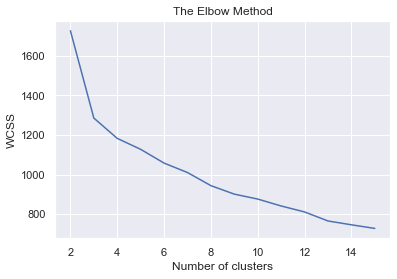

In [9]:
sns.lineplot(x='K', y='WCSS', data=  optimal_k)
plt.title('The Elbow Method')
plt.xlabel('Number of clusters')
plt.ylabel('WCSS')
plt.show()

Using the table and the plot, it appears that the optimal k is 3.

2. Fit the K-Means to the data set and compare clusters with customer_segments. Use n_clusters=3 even if 3 is not the optimal number of clusters. We want to figure out what was the logic behind segmenting the customers into 3 groups in the original data set.

In [24]:
kmeans = KMeans(n_clusters=3, random_state=300)
clusters = kmeans.fit_predict(df_sc)
print(*clusters, sep = ", ")

1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 2, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2


In [33]:
temp = df["Customer_Segment"]
print(*temp, sep = ", ")

1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3


Visually, it appears that the clustering model is doing a fairly good job. Note that the numbers are not the same, but thats okay, we are only concerned with what is being clustered where. We see that there are a few misclassifications, but other than that, the clusters line up quite well.

3. Find the accuracy of your clustering method. (important note: we know that Kmean clustering is an unsupervised model so finding the accuracy of the model does not make sense. However, in this example we can use the customer_Segment variable as target and construct the confusion matrix based on that. Finally you can report the accuracy for this set up)  (10 points)

In [25]:
from sklearn.metrics import confusion_matrix
def multi_confusion_matrix(y, y_hat):
    cm = confusion_matrix(y, y_hat)
    accuracy = round(np.diag(cm).sum()/cm.sum(),2)
    print('\n')
    print('Accuracy = {}'.format(accuracy))
    print("-----------------------------------------")
    return cm

In [31]:
multi_confusion_matrix(temp - 1, clusters)



Accuracy = 0.28
-----------------------------------------


array([[ 0, 59,  0],
       [68,  2,  1],
       [ 0,  0, 48]], dtype=int64)

We have an accuracy of .28, this is because our numbers do not line up. We need to swap the first and second rows and thn caclulate the accuracy. doing this, we get an accuracy of .983. This is pretty dang good!

### Question 2

Use the AgglomerativeClustering() class from sklearn.cluster module. 

1. Explain why it is not a good idea to use dendrogram to find the optimal number of clusters in this exercise!

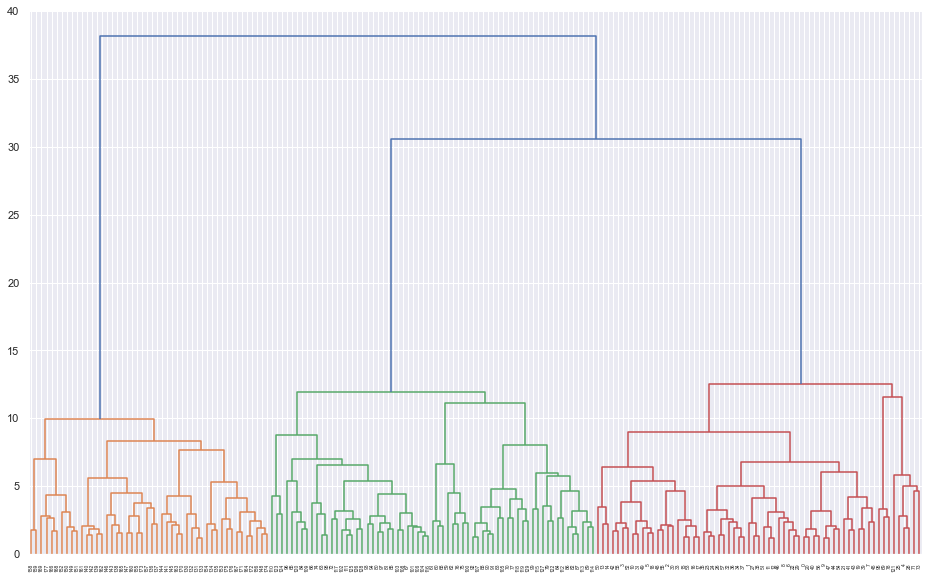

In [34]:
import scipy.cluster.hierarchy as sch
plt.figure(figsize=(16,10))
dend = sch.dendrogram(sch.linkage(df_sc,method='ward'))
# 'ward' uses the 'ward' linkage method (minimize the WCV)

As can be seen, this is complete nonsense. It is difficult, if not impossible to distinguish all the endpoints. So with so many values, its not appropriate to use a dendrogram.

2. Fit the hierarchical clustering to the data set and compare clusters with customer_segments. Use n_clusters=3 even if 3 is not the optimal number of clusters

In [35]:
from sklearn.cluster import AgglomerativeClustering
hc = AgglomerativeClustering(n_clusters = 3, affinity = 'euclidean', linkage = 'ward')
hc_clusters = hc.fit_predict(df_sc)

In [36]:
print(*hc_clusters, sep = ", ")

0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 0, 2, 0, 2, 0, 2, 2, 2, 2, 0, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 0, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 0, 2, 2, 2, 2, 2, 2, 2, 2, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1


In [37]:
print(*temp, sep = ", ")

1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3


Using the same method from before, we see that hierarchical clustering also does pretty well and follow the customer segments. There are only a few observations being misclassified.

3. Report the accuracy of your clustering method. (again use the customer_Segment variable as target and construct the confusion matrix based on that)

In [38]:
multi_confusion_matrix(temp - 1, hc_clusters)



Accuracy = 0.33
-----------------------------------------


array([[59,  0,  0],
       [ 6,  0, 65],
       [ 0, 48,  0]], dtype=int64)

Again, we have a similar issue as before, we have different values, in this case, we need to swap rows 2 and 3 and again calculate the accuracy by hand. Doing this, we get an accuracy of .966, which is quite good, but slightly worse than Kmeans.